In [ ]:
# Import Lib
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [32]:
# Load survey data
df = pd.read_csv('survey_data.csv')

In [33]:
# check top rows
df.head()

age gender  total_income                                           expenses
0   35   Male      150000.0  {'utilities': 15000.0, 'entertainment': 10000....
1   27   Male      100000.0  {'utilities': 5000.0, 'entertainment': 15000.0...
2   25   Male      205000.0  {'utilities': 25000.0, 'entertainment': 20000....
3   20   Male      180000.0  {'utilities': 15000.0, 'entertainment': 5000.0...
4   40   Male      350000.0  {'utilities': 50000.0, 'entertainment': 45000....

In [34]:
# check the data type of expense column
print(df['expenses'].head()) 
print(df['expenses'].apply(type).unique())  

0    {'utilities': 15000.0, 'entertainment': 10000....
1    {'utilities': 5000.0, 'entertainment': 15000.0...
2    {'utilities': 25000.0, 'entertainment': 20000....
3    {'utilities': 15000.0, 'entertainment': 5000.0...
4    {'utilities': 50000.0, 'entertainment': 45000....
Name: expenses, dtype: object
[<class 'str'>]


In [35]:
# Convert string expense column to actua dictionaries
df['expenses'] = df['expenses'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [36]:
# Expand the 'expenses' column to show the different expense categories
expenses_df = pd.json_normalize(df['expenses'])

# view top rows
print(expenses_df.head())

   utilities  entertainment  school_fees  shopping  healthcare
0    15000.0        10000.0      20000.0   12500.0      7500.0
1     5000.0        15000.0      35000.0   15500.0     11500.0
2    25000.0        20000.0      18750.0   22450.0     34000.0
3    15000.0         5000.0      50000.0    5000.0      3500.0
4    50000.0        45000.0     100000.0   70000.0     25000.0


In [39]:
# Combine the original DataFrame with the expanded expenses DataFrame and drop original expense column
df = df = pd.concat([df.drop(columns=['expenses']), expenses_df], axis=1)

In [38]:
df.head()

age gender  total_income  utilities  entertainment  school_fees  shopping  \
0   35   Male      150000.0    15000.0        10000.0      20000.0   12500.0   
1   27   Male      100000.0     5000.0        15000.0      35000.0   15500.0   
2   25   Male      205000.0    25000.0        20000.0      18750.0   22450.0   
3   20   Male      180000.0    15000.0         5000.0      50000.0    5000.0   
4   40   Male      350000.0    50000.0        45000.0     100000.0   70000.0   

   healthcare  
0      7500.0  
1     11500.0  
2     34000.0  
3      3500.0  
4     25000.0

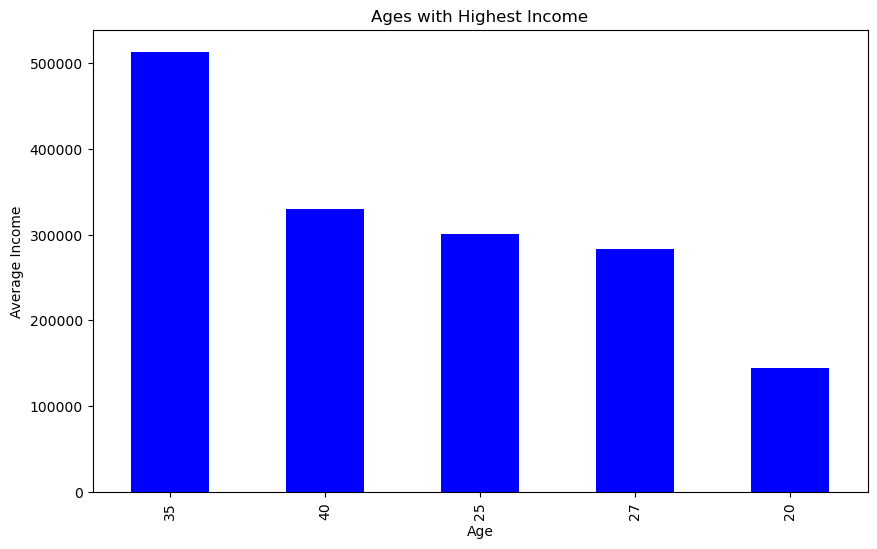

In [1]:
# Analysis: Ages with the highest income
top_ages = df.groupby('age')['total_income'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
top_ages.plot(kind='bar', color='blue')
plt.title('Ages with Highest Income')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.savefig('highest_income_ages.png')  # Save chart for PowerPoint

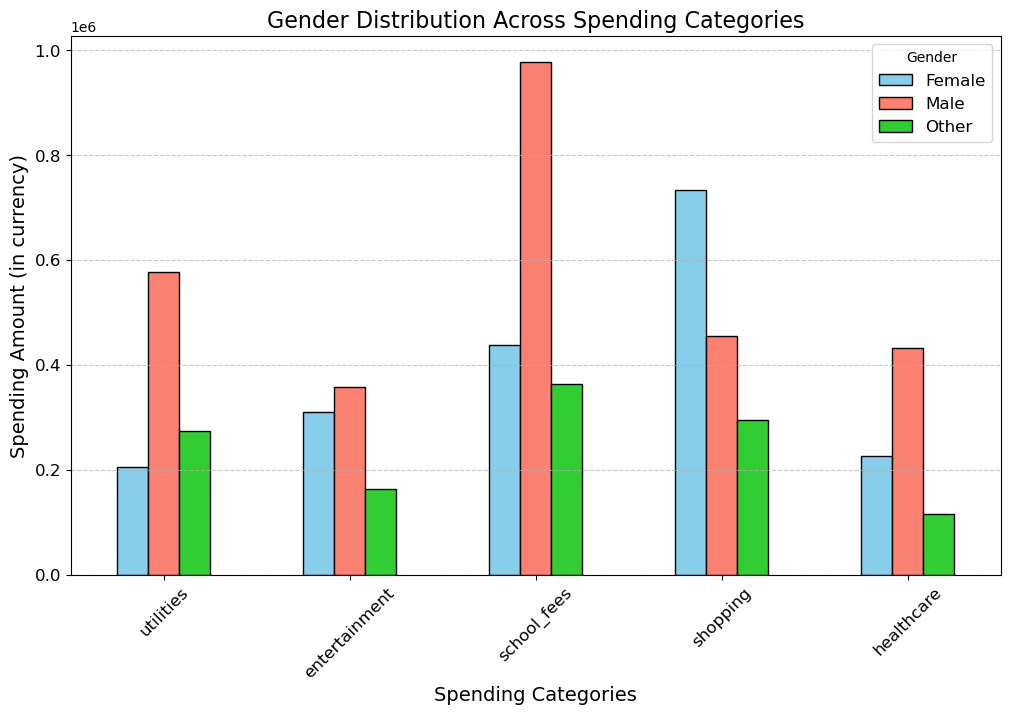

In [42]:
# Sum spending by gender 
gender_spending = df.groupby('gender')[['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']].sum()

# Plotting
ax = gender_spending.T.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon', 'limegreen'], edgecolor='black')
plt.title('Gender Distribution Across Spending Categories', fontsize=16)
plt.ylabel('Spending Amount (in currency)', fontsize=14)
plt.xlabel('Spending Categories', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image
plt.savefig('gender_spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
